# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Image Recommender System Using Deep Approach</p>

<p style="text-align:center; ">
<img src="https://i0.wp.com/wideeyes.ai/wp-content/uploads/2019/03/similar-2.jpg?w=966&ssl=1" style='width: 600px; height: 330px;'>
</p>

<p style="text-align:justify; ">
A recommendation system is a machine learning algorithm that suggests products, services, events etc. to users based on analysis of data. It basically acts as a filter, which helps users to discover new products and services they would like. Every time that you use an online service or look for a product, a recommendation system is guiding you towards the product you are most likely to purchase. These system algorithms are like salesmen, who know what you would be interested in based on your history and preferences.
<br><br>
It is imperative to have these system algorithms, since most of the users are overwhelmed by the range of e-commerce services and need reliable help to find what they’re looking for. This leads to happy customers and obviously more sales. Here we will implement fashion products recommender system using deep approach. 
     
</p>    

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
    

    
|No  | Contents |No  | Contents  |No  | Contents  |
|:---| :---     |:---| :----     |:---| :----     |
|1   | [<font color="#092434"> Importing Libraries</font>](#1)             |5   | [<font color="#092434"> Data Preprocessing</font>](#5)                |9   | [<font color="#092434"> Feature Generation</font>](#9) |
|2   | [<font color="#092434"> About Dataset</font>](#2)                   |6   | [<font color="#092434"> Customization For Visualization</font>](#6)        |10   | [<font color="#092434"> Recommender Engine</font>](#10) |
|3   | [<font color="#092434"> Basic Exploration</font>](#3)               |7  | [<font color="#092434"> Dataset Splitting</font>](#7)       |11   | [<font color="#092434"> Thank You</font>](#11)  |     
|4   | [<font color="#092434"> Dataset Summary</font>](#4)                 |8  | [<font color="#092434"> Model Creation</font>](#8)                                  
       
           


<a id="1"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
import cv2
import pickle
import warnings
warnings.filterwarnings("ignore")


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import DenseNet121

<a id="2"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

This dataset contains two folders and two csv files.<br><br>
**Folders:**
* **images:** Contains 44.4K images of products<br>
* **styles:** Contains 44.4K metadatas of products



**CSV Files:**
* **images.csv** 
 * **filename:** Unique id value of product's image
 * **link:** Link of the image
 
 
* **styles.csv** 
 * **id:** Unique id value of product's image
 * **gender:** Product used by gender
 * **masterCategory:** Master category of the product
 * **subCategory:** Sub category under master category of the product
 * **articleType:** Name/Type of the product
 * **baseColour:** Color of the product
 * **season:** Season of the usage of the product
 * **year:** Year of usage of the product
 * **usage:** Usage type of the product
 * **productDisplayName:** Display name of the product


<a id="3"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</p>


**Let's have a glimpse of the dataset.**

In [79]:
datacsv = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv", error_bad_lines=False, warn_bad_lines=False, nrows=6000)
categorydata = datacsv[["id","articleType"]]
print(f"We have taken 6K items of the dataset. \nSo the shape of the dataset is {categorydata.shape}.")
print(f"\nGlimpse of the dataset :")
categorydata.head(10).T.style.set_properties(**{"background-color": "#ddab46","color":"#092434","border": "1.5px #ddab46"})

We have taken 6K items of the dataset. 
So the shape of the dataset is (6000, 2).

Glimpse of the dataset :


,0,1,2,3,4,5,6,7,8,9
id,15970,39386,59263,21379,53759,1855,30805,26960,29114,30039
articleType,Shirts,Jeans,Watches,Track Pants,Tshirts,Tshirts,Shirts,Shirts,Socks,Watches


In [80]:
print(f"Informations of the dataset :\n")
print(categorydata.info())

Informations of the dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6000 non-null   int64 
 1   articleType  6000 non-null   object
dtypes: int64(1), object(1)
memory usage: 93.9+ KB
None


<a id="4"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

In [81]:
print(f"Summary of the dataset :")
categorydata.describe().T.style.set_properties(**{"background-color": "#ddab46","color":"#092434","border": "1.5px #ddab46"})

Summary of the dataset :


,count,mean,std,min,25%,50%,75%,max
id,6000.000000,29903.574167,17106.262875,1607.000000,14866.750000,28796.000000,44923.250000,59988.000000


In [82]:
categorydata.describe(include="object").T.style.set_properties(**{"background-color": "#ddab46","color":"#452912","border": "1.5px #ddab46"})

,count,unique,top,freq
articleType,6000,117,Tshirts,900


In [83]:
dup = categorydata[categorydata.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {categorydata.shape[0]} entries in this dataset.")

categorydata.drop_duplicates(keep="first",inplace=True)
print(f"After removing duplicate entries there are {categorydata.shape[0]} entries in this dataset.")

There is 0 duplicate entry among 6000 entries in this dataset.
After removing duplicate entries there are 6000 entries in this dataset.


In [84]:
print(f"Null values of the Dataset :")
categorydata.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#ddab46","color":"#452912","border": "1.5px #ddab46"})

Null values of the Dataset :


,id,articleType
0,0,0


**Insights:**

* There is no duplicate values in this dataset.
* There is no missing values in this dataset.


<a id="5"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [85]:
categorydata = categorydata.groupby(["articleType"], sort=True).size().reset_index(name="Total")
categories = categorydata["articleType"].tolist()
print(f"The shape of the category data is {categorydata.shape}.")
print(f"There are {len(categories)} categories.")
print(f"The categories are :\n\n{categories}")

The shape of the category data is (117, 2).
There are 117 categories.
The categories are :

['Accessory Gift Set', 'Baby Dolls', 'Backpacks', 'Bangle', 'Bath Robe', 'Beauty Accessory', 'Belts', 'Blazers', 'Boxers', 'Bra', 'Bracelet', 'Briefs', 'Camisoles', 'Capris', 'Caps', 'Casual Shoes', 'Churidar', 'Clutches', 'Compact', 'Cufflinks', 'Deodorant', 'Dresses', 'Duffel Bag', 'Dupatta', 'Earrings', 'Eye Cream', 'Eyeshadow', 'Face Moisturisers', 'Face Scrub and Exfoliator', 'Face Wash and Cleanser', 'Flats', 'Flip Flops', 'Footballs', 'Formal Shoes', 'Foundation and Primer', 'Fragrance Gift Set', 'Free Gifts', 'Gloves', 'Handbags', 'Headband', 'Heels', 'Highlighter and Blush', 'Innerwear Vests', 'Jackets', 'Jeans', 'Jeggings', 'Jewellery Set', 'Jumpsuit', 'Kajal and Eyeliner', 'Kurta Sets', 'Kurtas', 'Kurtis', 'Laptop Bag', 'Leggings', 'Lip Care', 'Lip Gloss', 'Lip Liner', 'Lipstick', 'Lounge Pants', 'Lounge Shorts', 'Lounge Tshirts', 'Mask and Peel', 'Messenger Bag', 'Mobile Pouch', 'Muf

In [86]:
print("After preprocessing, let's have a glimpse of the category dataset :")
categorydata.head(10).T.style.set_properties(**{"background-color": "#ddab46","color":"#452912","border": "1.5px #ddab46"})

After preprocessing, let's have a glimpse of the category dataset :


,0,1,2,3,4,5,6,7,8,9
articleType,Accessory Gift Set,Baby Dolls,Backpacks,Bangle,Bath Robe,Beauty Accessory,Belts,Blazers,Boxers,Bra
Total,8,2,94,11,4,1,112,1,5,87


<a id="6"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Customization For Visualization</p>

In [87]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#e3be77", "figure.facecolor":"#e3be77",
            "axes.grid":False, "grid.color":"black", "axes.edgecolor":"black",
            "grid.linestyle": u"-", "axes.labelcolor": "black", "font.family": [u"DejaVu Sans"],
            "text.color": "black","xtick.labelbottom":False, "xtick.color": "black", "ytick.labelleft":False, "ytick.color": "black",
            "legend.facecolor":"#e3be77", "legend.frameon": True, "legend.edgecolor":"black"})
sns.set_context("poster",font_scale = .7)

Let's have a look on sample product image.
Shape of the sample image : (224, 224, 3)


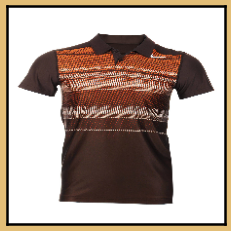

In [88]:
image = cv2.imread("/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/10022.jpg")
image = cv2.resize(image, (224, 224))
print(f"Let's have a look on sample product image.")
print(f"Shape of the sample image : {image.shape}")
plt.imshow(image)
plt.show()

<a id="7"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Splitting</p>

In [89]:
def traintestsplit(Data):
    
    train_data = pd.DataFrame()
    test_data = pd.DataFrame()
    for i in range(len(Data)):
        total = Data.iloc[i]["Total"]
        category = Data.iloc[i]["articleType"]
        data = datacsv[datacsv["articleType"] == category]
        train_limit = int((80*total/100))
        train_data = train_data.append(data.iloc[0:train_limit-1])
        test_data = test_data.append(data.iloc[train_limit:])
    
    return train_data, test_data


In [90]:
train_data, test_data = traintestsplit(categorydata)

print("After splitting, let's have a glimpse of the training dataset :")
print(f"Shape of the training dataset is {train_data.shape}.")
train_data.head().style.set_properties(**{"background-color": "#ddab46","color":"#452912","border": "1.5px #ddab46"})

After splitting, let's have a glimpse of the training dataset :
Shape of the training dataset is (4648, 10).


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
1151,19929,Men,Accessories,Accessories,Accessory Gift Set,Blue,Fall,2011,Formal,Reid & Taylor Men Formal Blue Tie+Cufflink+Pocket square - Combo Pack
2224,31187,Men,Accessories,Accessories,Accessory Gift Set,Black,Summer,2015,Casual,Cabarelli Men Accessory Gift Set
2566,58920,Men,Accessories,Accessories,Accessory Gift Set,Maroon,Summer,2012,Casual,Hakashi Men Combo pack Tie+Cufflink+Pocket square
3764,19926,Men,Accessories,Accessories,Accessory Gift Set,Black,Fall,2011,Formal,Reid & Taylor Men Formal Black Tie+Cufflink+Pocket square - Combo Pack
4181,58921,Men,Accessories,Accessories,Accessory Gift Set,Multi,Summer,2012,Casual,Hakashi Men Combo pack Tie+Cufflink+Pocket square


In [91]:
print("After splitting, let's have a glimpse of the testing dataset :")
print(f"Shape of the testing dataset is {test_data.shape}.")
test_data.head().style.set_properties(**{"background-color": "#ddab46","color":"#452912","border": "1.5px #ddab46"})

After splitting, let's have a glimpse of the testing dataset :
Shape of the testing dataset is (1259, 10).


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
5880,25055,Men,Accessories,Accessories,Accessory Gift Set,Brown,Winter,2015,Formal,Lino Perros Men Formal Brown Accessory Gift Set
5981,17369,Men,Accessories,Accessories,Accessory Gift Set,Purple,Fall,2011,Formal,Arrow Men Formal Purple Tie+Cufflink+Pocket square - Combo Pack
3622,52480,Women,Apparel,Loungewear and Nightwear,Baby Dolls,Blue,Winter,2015,Casual,Red Rose Blue & Black Nightdress
4822,35189,Unisex,Accessories,Bags,Backpacks,Red,Summer,2015,Casual,Wildcraft Unisex Red Solid Backpack
4885,35174,Unisex,Accessories,Bags,Backpacks,Black,Summer,2015,Casual,Wildcraft Unisex Black Printed Laptop Backpack


<a id="8"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Creation</p>

We will use pre-trained resnet model for this project.

In [92]:
def resnetmodel(height, width):
    model = ResNet50(weights="imagenet", include_top=False, input_shape = (height, width, 3))
    model.trainable = False
    output = layers.GlobalMaxPooling2D()(model.outputs)
    model = Model(inputs=model.inputs, outputs=output)
    model.summary()
    return model


In [93]:
model = resnetmodel(image.shape[0], image.shape[1])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [94]:
print(f"Shape of sample image before expanding dimension : {image.shape}")
image =  np.expand_dims(image, axis = 0) 
print(f"Shape of sample image after expanding dimension : {image.shape}")

Shape of sample image before expanding dimension : (224, 224, 3)
Shape of sample image after expanding dimension : (1, 224, 224, 3)


<a id="9"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Generation</p>


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#ddab46;font-size:200%;font-weight: 500;color:#1c1c1c;overflow:hidden;">ㅤSingle Feature Vectorㅤ</span>

In [95]:
def getfeaturevector(model, image):
    featurevector = model.predict(image)
    featurevector = featurevector.flatten()
    return featurevector

featurevector = getfeaturevector(model, image)
print(f"Shape of the feature vector of the sample image : {featurevector.shape}")

Shape of the feature vector of the sample image : (14336,)


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#ddab46;font-size:200%;font-weight: 500;color:#1c1c1c;overflow:hidden;">ㅤAll Feature Vectorsㅤ</span>

In [96]:
def generatefeatures(model, data):
    image_labels = []
    image_features = []
    image_ids = []
    image_path = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/"
    
    for index, row in data.iterrows():
        imageid = row["id"]
        image_ids.append(imageid)
        imagelabel = row["articleType"]
        image_labels.append(imagelabel)
        image = cv2.imread(image_path + str(imageid) + ".jpg")
        image = cv2.resize(image, (224, 224))
        image = np.expand_dims(image, axis = 0) 
        featurevector = getfeaturevector(model, image)
        image_features.append(featurevector)

    return np.array(image_features), image_labels, image_ids

In [97]:
train_features, train_labels , train_ids = generatefeatures(model, train_data)
test_features, test_labels, test_ids = generatefeatures(model, test_data)

In [98]:
def loadfrompickle(picklefile):
    file = open(picklefile,"rb")
    pickledata = pickle.load(file)
    file.close()
    return pickledata

def saveinpickle(data, picklefile):
    file = open(picklefile,"wb")
    pickle.dump(data,file)
    file.close()


print(f"Saving features in pickle files for further usage in recommender engine.")    
saveinpickle([train_features, train_labels , train_ids], "resnet_train")
saveinpickle([test_features, test_labels, test_ids], "resnet_test")

Saving features in pickle files for further usage in recommender engine.


<a id="10"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Recommender Engine</p>

In [99]:
def showimage(testid, imagelabel):
    imagepath = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/"
    image = cv2.imread(imagepath + str(int(testid)) + ".jpg")
    plt.figure()
    plt.imshow(image)
    plt.title(f" {imagelabel} :\n")  
    plt.show()
    
    
def showrecommendations(trainindex):
    ids = []
    for index in trainindex:
        imagepath = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/"
        ids.append(train_ids[index])
        
    fig, axs = plt.subplots(1, 5, figsize=(20,8))
    for i, ax in enumerate(axs.flatten()):
        plt.sca(ax)
        image = cv2.imread(imagepath + str(int(ids[i])) + ".jpg")
        plt.imshow(image)
        # plt.title(f"Recommended Image No. {i+1}\n")
        plt.title(f"You may also like\n")
        

def getpredictedresult(trainindex, trainsize, trainlabels):
    result = {}
    for index in trainindex:
        classid  = trainlabels[index]
        # print(classId)
        if(classid not in result):
            result[classid] = 0
        result[classid]+=1
    return max(result, key=result.get)


def KNNmodel(trainfeatures, trainlabels, k, testfeatures, testlabels):
    truelabels = []
    predictedlabels = [] 
    a = np.linalg.norm(testfeatures, axis=1, ord=2)
    b = np.linalg.norm(trainfeatures, axis=1, ord=2)
    a = a.reshape(len(testfeatures),1)
    b = b.reshape(1,len(trainfeatures))
    c = np.matmul(a,b)
    distancematrix =  np.dot(testfeatures, trainfeatures.T)/c
    # for i in range(3,8):
    imgids = [1, 4, 150, 255, 305, 355]
    for i in imgids:
        testclasslabel = test_labels[i]
        truelabels.append(testclasslabel)
        showimage(test_ids[i], testclasslabel)
        traindistance = distancematrix[i]
        trainindex = traindistance.argsort()[-k:]
        showrecommendations(trainindex)
        result = getpredictedresult(trainindex, len(trainfeatures), trainlabels)
        predictedlabels.append(result)    
    
    return truelabels, predictedlabels

In [100]:
def loadtrainfeatures(modelname):
    trainset = loadfrompickle(modelname + "_train")
    return trainset[0], trainset[1], trainset[2]

def loadtestfeatures(modelname):
    testset = loadfrompickle(modelname + "_test")
    return testset[0], testset[1], testset[2]


print(f"Loading features and labels from pickle files")
trainfeatures, trainlabels, trainids = loadtrainfeatures("/kaggle/working/resnet")
testfeatures, testlabels, testids = loadtestfeatures("/kaggle/working/resnet")

Loading features and labels from pickle files


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#ddab46;font-size:200%;font-weight: 500;color:#1c1c1c;overflow:hidden;">ㅤGetting Recommendationㅤ</span>

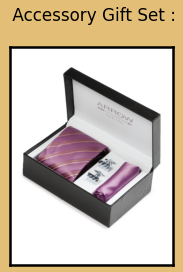

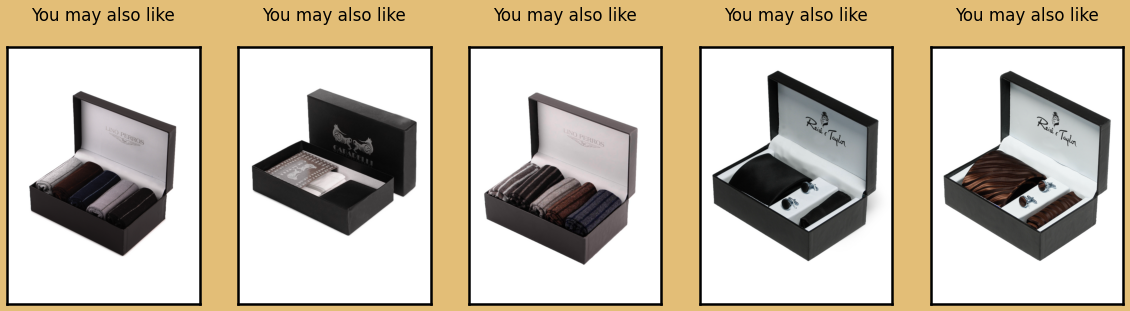

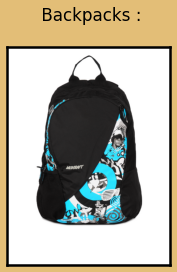

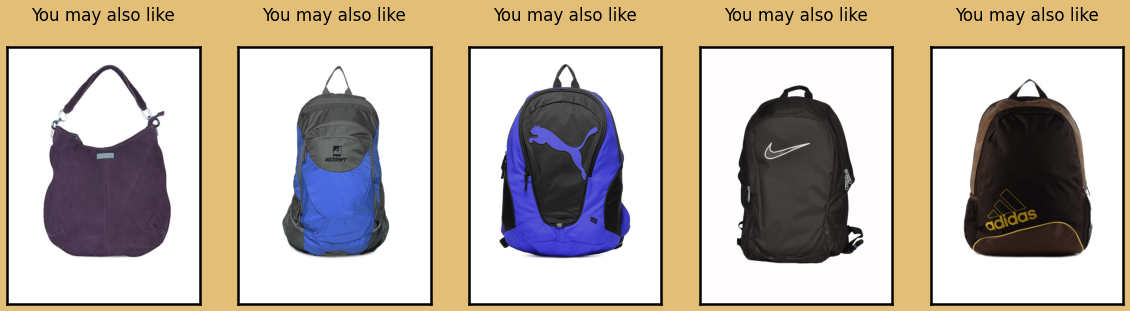

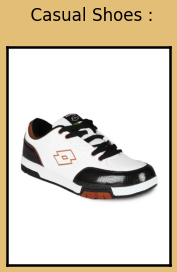

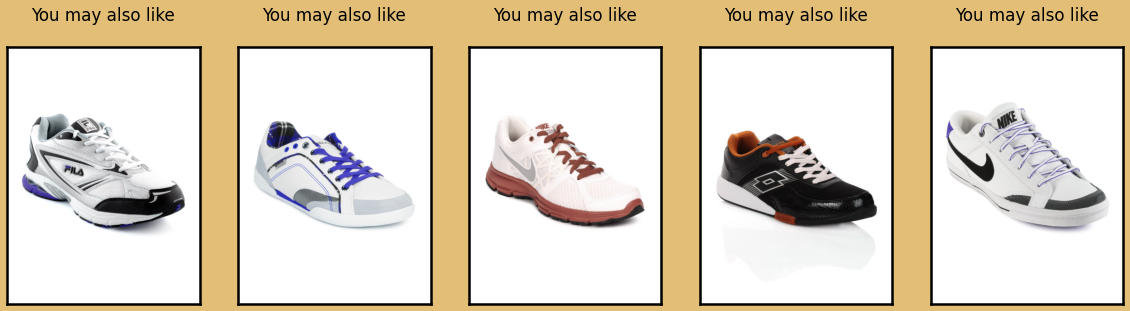

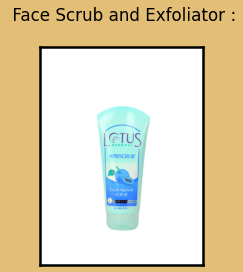

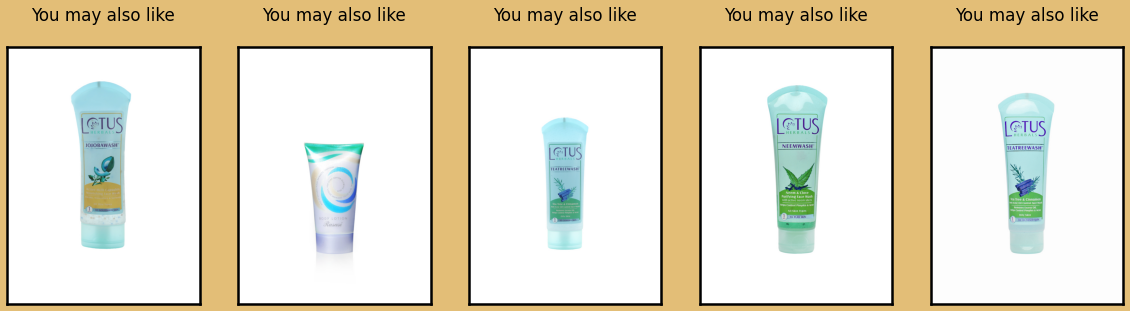

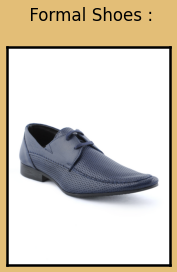

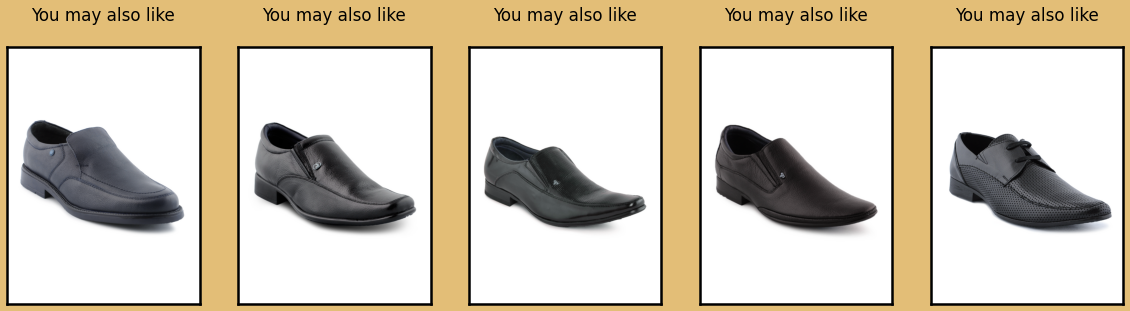

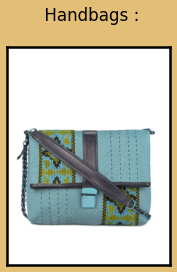

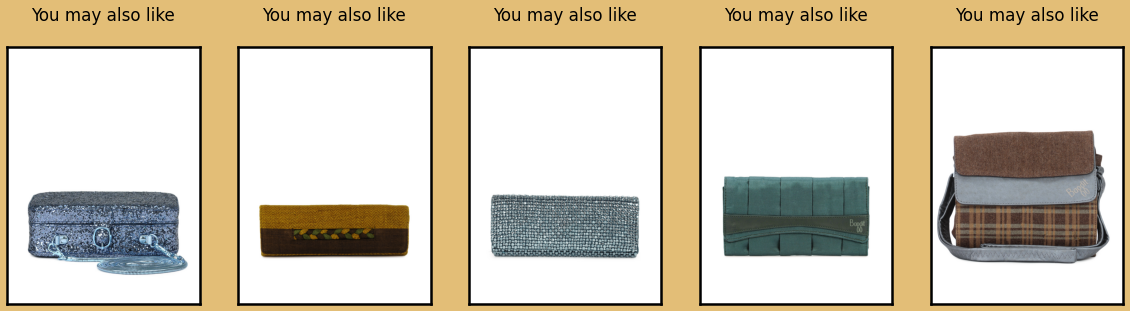

In [101]:
truelabels, predictedlabels = KNNmodel(trainfeatures, trainlabels, 5, testfeatures, testlabels)

<a id="11"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>


<p>
<h3><font color="#1c1c1c">If you liked this notebook kindly upvote. Your feedback will be highly appreciated.</font></h3>

<br>

<h4><b>Author :</b></h4>

<h3>Hasib Al Muzdadid</h3>

<b>👉Shoot me mails :</b> muzdadid@gmail.com<br>
<b>👉Connect on LinkedIn :</b> https://www.linkedin.com/in/hasibalmuzdadid <br>
<b>👉Explore Github :</b> https://github.com/HasibAlMuzdadid    
    
</p> 